In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import shap
import matplotlib.pyplot as plt


In [2]:
# Load the dataset. Adjust the filename/path if needed.
df = pd.read_csv("lr_dataset.csv")

# List of engineered numeric features from our partitions.
numeric_features = [
    "lambda_list", "lambda_length", "lambda_durfee", "lambda_area", "lambda_lattice",
    "mu_list", "mu_length", "mu_durfee", "mu_area", "mu_lattice",
    "nu_list", "nu_length", "nu_durfee", "nu_area", "nu_lattice"
]

# Convert the selected columns to numeric, coercing errors to NaN,
# then fill any NaN values with 0.
for col in numeric_features:
    df[col] = pd.to_numeric(df[col], errors="coerce").fillna(0)

# Create a binary target: 1 if the LR coefficient is nonzero, else 0.
df["target"] = (df["lr_coefficient"] > 0).astype(int)

# Define feature matrix X and target vector y.
X = df[numeric_features]
y = df["target"]

# Check for NaNs (this should now be empty)
print("Any NaN in features?", X.isna().sum().sum())


Any NaN in features? 0


In [3]:


# Split the dataset into training (80%) and testing (20%) sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a RandomForestClassifier.
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Evaluate the model on the test set.
y_pred = rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", accuracy)





Test Accuracy: 0.6617647058823529


In [4]:
# -----------------------------
# Saliency Analysis with SHAP
# -----------------------------
# Create a SHAP TreeExplainer for the RandomForest model.
explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(X_test)


<Figure size 640x480 with 0 Axes>

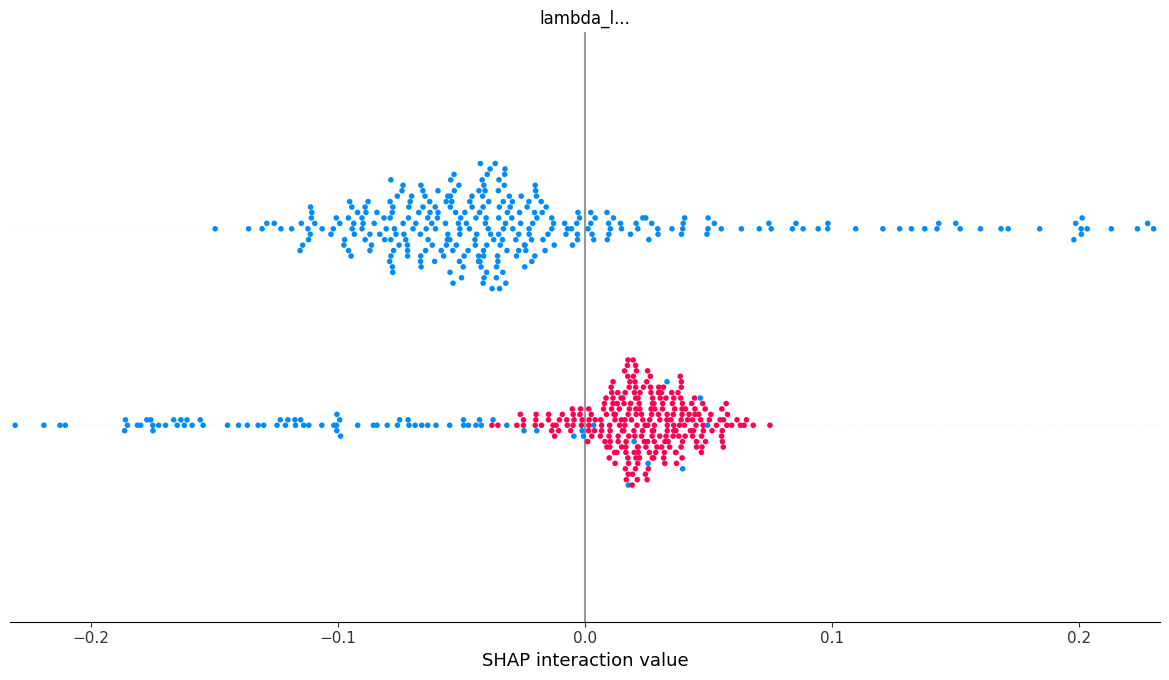

In [5]:
# Produce a summary plot showing feature importance.
shap.summary_plot(shap_values, X_test, feature_names=numeric_features)
plt.show()


<Figure size 640x480 with 0 Axes>

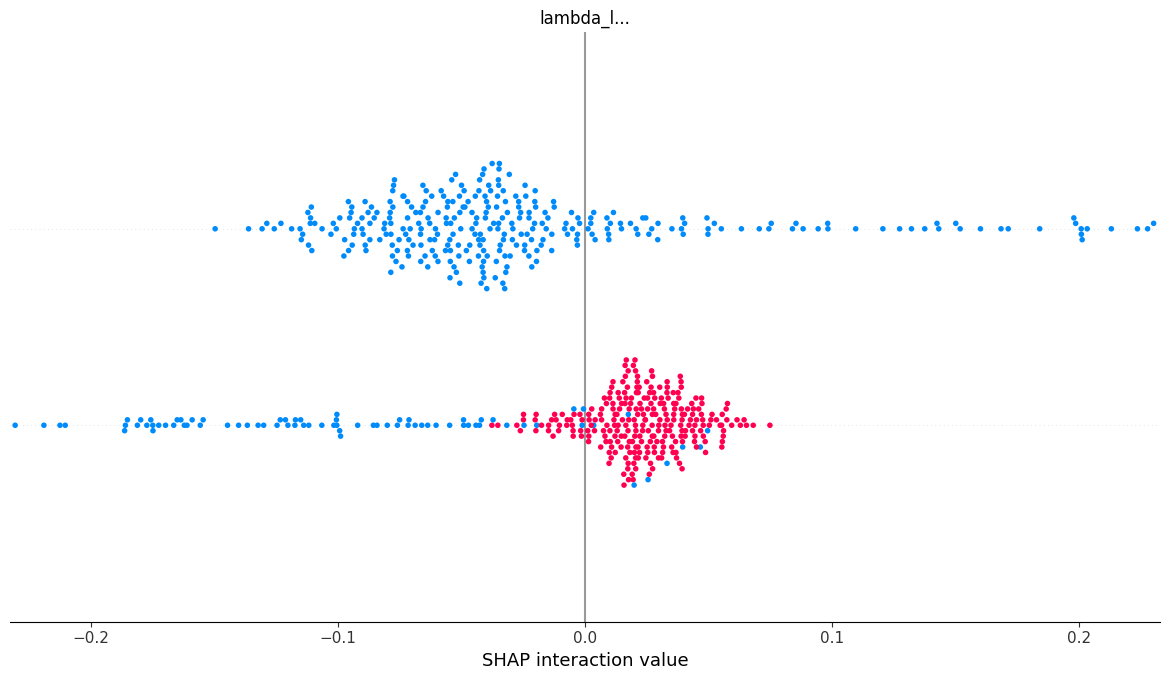

In [6]:
# Produce a bar plot for overall feature importance.
shap.summary_plot(shap_values, X_test, plot_type="bar", feature_names=numeric_features)
plt.show()